<a href="https://colab.research.google.com/github/Aashrit77/Python/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [16]:
claimant = pd.read_csv("/content/claimants.csv")
claimant.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [17]:
claimant.drop(["CASENUM"],inplace=True,axis=1)

In [18]:
claimant.shape

(1340, 6)

In [19]:
claimant=claimant.dropna()
claimant.shape

(1096, 6)

In [20]:
# deviding data into input and output variables:
X = claimant.iloc[:,1:]
Y = claimant.iloc[:,0]

In [21]:
# now we will be instanchating the model
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
y_pred = classifier.predict(X)

In [23]:
y_pred_df = pd.DataFrame({"Actual": Y,"Predicted": y_pred})

In [24]:
y_pred_df

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
1334,1,1
1336,0,0
1337,1,1
1338,0,0


# Now we will look into the accuracy

In [26]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion =confusion_matrix(Y,y_pred)
print(confusion)

[[381 197]
 [123 395]]


In [27]:
((381+395)/(381+197+123+395))*100

70.8029197080292

# now to view the spceificity and all we do

In [28]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



In [29]:
#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [30]:
fpr, tpr, threshols = roc_curve(Y,classifier.predict_proba(X)[:,1])

In [31]:
auc = roc_auc_score(Y,y_pred)

Text(0, 0.5, 'True positive rate')

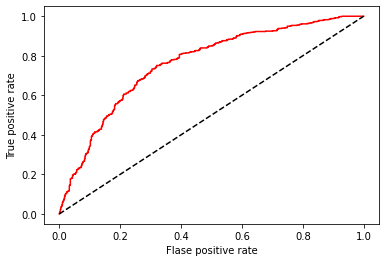

In [34]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color="red")
plt.plot([0,1],[0,1],"k--") #this is used to plot the dotten diagnal line
plt.xlabel("Flase positive rate")
plt.ylabel("True positive rate")

In [35]:
auc

0.7108589063606365